In [1]:
import warnings

warnings.simplefilter(action="ignore", category=FutureWarning)

import jupyter_black

jupyter_black.load()

import matplotlib.pyplot as plt
import pandas as pd
import pyam

<IPython.core.display.Javascript object>

In [2]:
output = pyam.IamDataFrame("polyclimate_alloutput.xlsx")
output

INFO:pyam.core:Reading file polyclimate_alloutput.xlsx


<class 'pyam.core.IamDataFrame'>
Index:
 * model    : Polyclimate (1)
 * scenario : Minus-5, Persistence, Plus-1 (3)
Timeseries data coordinates:
   region   : World (1)
   variable : ... (622)
   unit     : K, Mt BC/yr, Mt CH4/yr, Mt CO/yr, Mt CO2-equiv/yr, ... ppm (57)
   year     : 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, ... 2100 (106)
Meta indicators:
   exclude (bool) False (1)
   Exceedance Probability 1.5C (FaIRv1.6.2) (float64) 0.5033527045149754, ... 1.0 (3)
   Exceedance Probability 2.0C (FaIRv1.6.2) (float64) 0.0447027268663388, ... 1.0 (3)
   Exceedance Probability 2.5C (FaIRv1.6.2) (float64) 0.0022351363433169, ... (3)
   Exceedance Probability 3.0C (FaIRv1.6.2) (float64) 0.0, ... 0.9275815824765312 (3)
   ...

In [3]:
output.variable

['AR6 climate diagnostics|Atmospheric Concentrations|CH4|FaIRv1.6.2|10.0th Percentile',
 'AR6 climate diagnostics|Atmospheric Concentrations|CH4|FaIRv1.6.2|16.7th Percentile',
 'AR6 climate diagnostics|Atmospheric Concentrations|CH4|FaIRv1.6.2|17.0th Percentile',
 'AR6 climate diagnostics|Atmospheric Concentrations|CH4|FaIRv1.6.2|25.0th Percentile',
 'AR6 climate diagnostics|Atmospheric Concentrations|CH4|FaIRv1.6.2|33.0th Percentile',
 'AR6 climate diagnostics|Atmospheric Concentrations|CH4|FaIRv1.6.2|5.0th Percentile',
 'AR6 climate diagnostics|Atmospheric Concentrations|CH4|FaIRv1.6.2|50.0th Percentile',
 'AR6 climate diagnostics|Atmospheric Concentrations|CH4|FaIRv1.6.2|66.0th Percentile',
 'AR6 climate diagnostics|Atmospheric Concentrations|CH4|FaIRv1.6.2|67.0th Percentile',
 'AR6 climate diagnostics|Atmospheric Concentrations|CH4|FaIRv1.6.2|75.0th Percentile',
 'AR6 climate diagnostics|Atmospheric Concentrations|CH4|FaIRv1.6.2|83.0th Percentile',
 'AR6 climate diagnostics|Atmosph

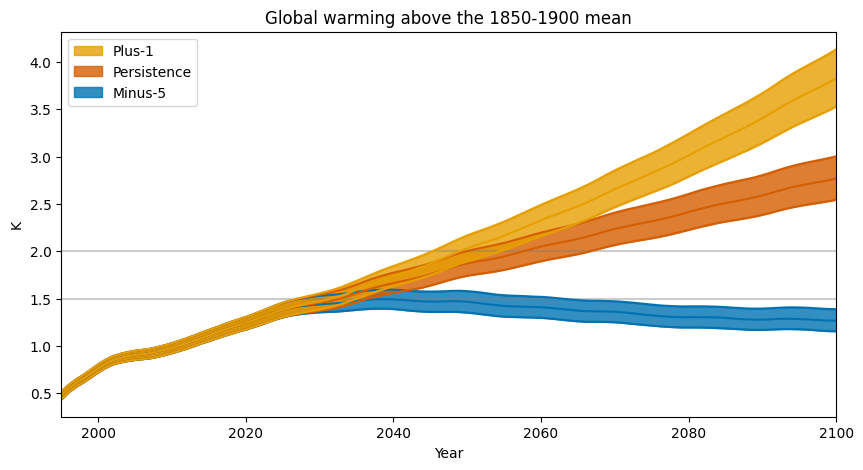

In [4]:
colors = {"Minus-5": "#0072B2", "Persistence": "#D55E00", "Plus-1": "#E69F00"}
fig, ax = plt.subplots(figsize=(10, 5))
ax.hlines(1.5, 1995, 2100, color="gray", alpha=0.4)
ax.hlines(2.0, 1995, 2100, color="gray", alpha=0.4)

for scenario in ["Minus-5", "Persistence", "Plus-1"]:
    ax.fill_between(
        output.filter(
            scenario=scenario,
            variable="*|Surface Temperature (GSAT)|*|33.0th Percentile",
        ).data.year,
        output.filter(
            scenario=scenario,
            variable="*|Surface Temperature (GSAT)|*|33.0th Percentile",
        ).data.value,
        output.filter(
            scenario=scenario,
            variable="*|Surface Temperature (GSAT)|*|66.0th Percentile",
        ).data.value,
        alpha=0.8,
        label=scenario,
        color=colors[scenario],
    )

    output.filter(
        scenario=scenario, variable="*|Surface Temperature (GSAT)|*|50.0th Percentile"
    ).plot(color=colors[scenario], ax=ax)
    output.filter(
        scenario=scenario, variable="*|Surface Temperature (GSAT)|*|33.0th Percentile"
    ).plot(color=colors[scenario], ax=ax)
    output.filter(
        scenario=scenario, variable="*|Surface Temperature (GSAT)|*|66.0th Percentile"
    ).plot(color=colors[scenario], ax=ax)
plt.title("Global warming above the 1850-1900 mean")
ax.set_xlim([1995, 2100])
ax.legend(reverse=True)

In [5]:
hist_df = pd.read_csv(
    "https://github.com/iiasa/climate-assessment/raw/485f3d24fc646ad8d77c65ac5e787a27dc79db04/src/climate_assessment/harmonization/history_ar6.csv"
)
hist_df.head()

,Model,Scenario,Region,Variable,Unit,1750,1751,1752,1753,1754,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,history,scen,World,AR6 climate diagnostics|Emissions|BC|Unharmonized,Mt BC/yr,2.097771,2.072926,2.064312,2.071951,2.099350,...,8.925648,9.284494,9.091851,9.109514,9.665129,9.478877,9.705285,9.560554,9.744380,9.727424
1,history,scen,World,AR6 climate diagnostics|Emissions|PFC|C2F6|Unh...,kt C2F6/yr,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.045423,1.766616,1.746034,1.799551,1.774218,1.846755,1.794986,1.632465,1.651700,1.570000
2,history,scen,World,AR6 climate diagnostics|Emissions|PFC|C6F14|Un...,kt C6F14/yr,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.359559,0.288658,0.274546,0.260430,0.232106,0.232180,0.232253,0.232326,0.299700,0.350000
3,history,scen,World,AR6 climate diagnostics|Emissions|PFC|CF4|Unha...,kt CF4/yr,0.010071,0.010071,0.010071,0.010071,0.010071,...,10.217350,9.327241,9.035343,9.685487,10.489470,11.056837,9.660946,8.302744,9.873500,10.869900
4,history,scen,World,AR6 climate diagnostics|Emissions|CH4|Unharmon...,Mt CH4/yr,19.019783,18.915109,18.889712,19.121377,19.509061,...,356.469690,355.022576,360.491711,364.200363,370.896253,372.657683,380.809767,381.594393,387.873539,388.072796


In [6]:
hist = pyam.IamDataFrame(hist_df)
hist.variable

['AR6 climate diagnostics|Emissions|BC|Unharmonized',
 'AR6 climate diagnostics|Emissions|CH4|Unharmonized',
 'AR6 climate diagnostics|Emissions|CO2|AFOLU|Unharmonized',
 'AR6 climate diagnostics|Emissions|CO2|Energy and Industrial Processes|Unharmonized',
 'AR6 climate diagnostics|Emissions|CO2|Unharmonized',
 'AR6 climate diagnostics|Emissions|CO|Unharmonized',
 'AR6 climate diagnostics|Emissions|F-Gases|Unharmonized',
 'AR6 climate diagnostics|Emissions|HFC|HFC125|Unharmonized',
 'AR6 climate diagnostics|Emissions|HFC|HFC134a|Unharmonized',
 'AR6 climate diagnostics|Emissions|HFC|HFC143a|Unharmonized',
 'AR6 climate diagnostics|Emissions|HFC|HFC227ea|Unharmonized',
 'AR6 climate diagnostics|Emissions|HFC|HFC23|Unharmonized',
 'AR6 climate diagnostics|Emissions|HFC|HFC32|Unharmonized',
 'AR6 climate diagnostics|Emissions|HFC|HFC43-10|Unharmonized',
 'AR6 climate diagnostics|Emissions|HFC|Unharmonized',
 'AR6 climate diagnostics|Emissions|N2O|Unharmonized',
 'AR6 climate diagnostics|E

In [7]:
output.filter(
    scenario=scenario, variable="AR6 climate diagnostics|Infilled|Emissions|CH4"
).convert_unit("Mt CH4/yr", to="Mt CO2e/yr", context="AR6GWP100")

<class 'pyam.core.IamDataFrame'>
Index:
 * model    : Polyclimate (1)
 * scenario : Plus-1 (1)
Timeseries data coordinates:
   region   : World (1)
   variable : AR6 climate diagnostics|Infilled|Emissions|CH4 (1)
   unit     : Mt CO2e/yr (1)
   year     : 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, ... 2100 (86)
Meta indicators:
   exclude (bool) False (1)
   Exceedance Probability 1.5C (FaIRv1.6.2) (float64) 1.0 (1)
   Exceedance Probability 2.0C (FaIRv1.6.2) (float64) 1.0 (1)
   Exceedance Probability 2.5C (FaIRv1.6.2) (float64) 0.9946356727760394 (1)
   Exceedance Probability 3.0C (FaIRv1.6.2) (float64) 0.9275815824765312 (1)
   ...

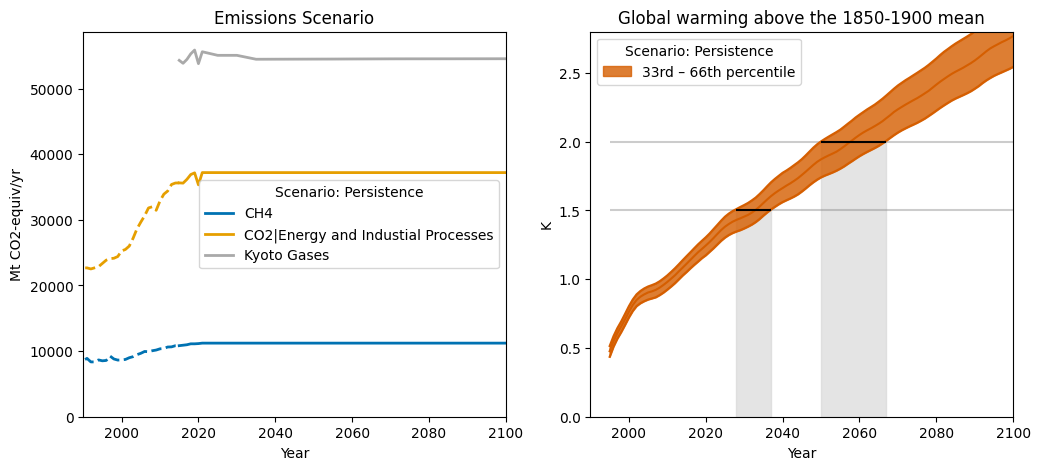

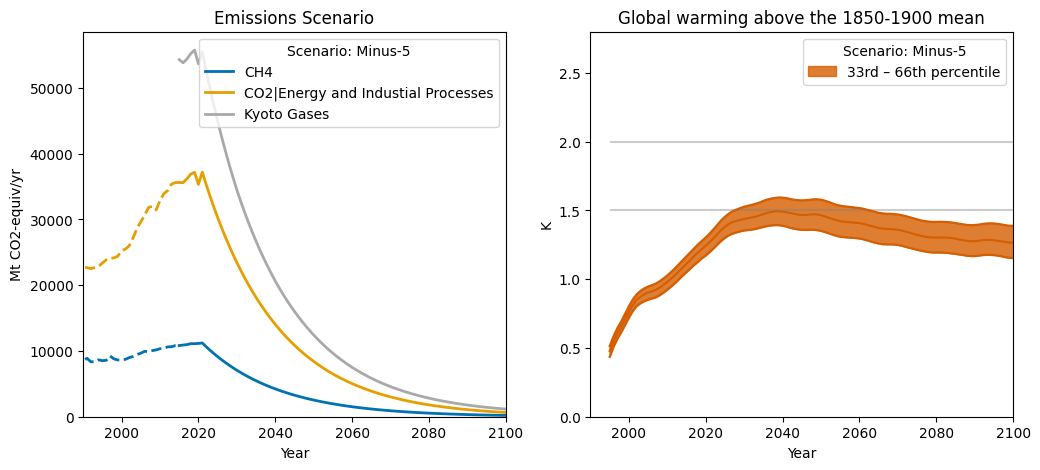

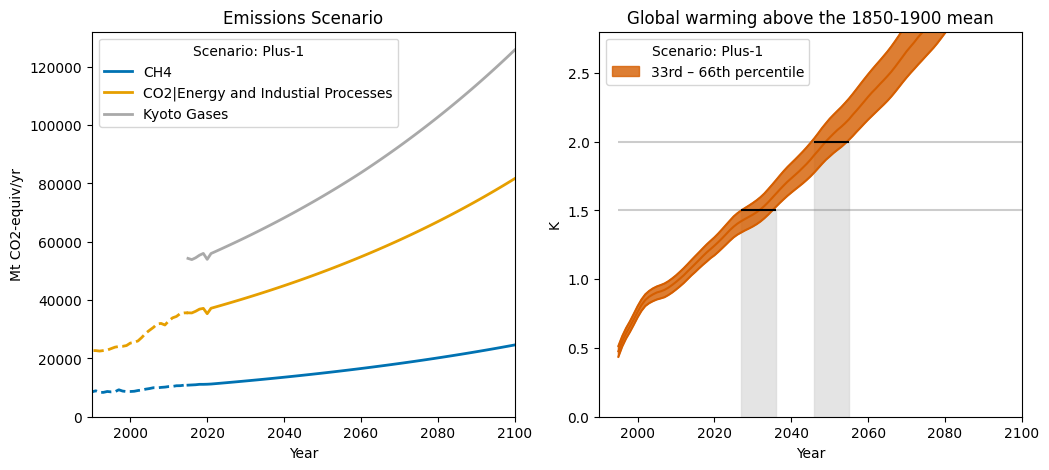

In [8]:
blue = "#0072B2"
red = "#D55E00"
orange = "#E69F00"
for scenario in ["Persistence", "Minus-5", "Plus-1"]:
    fig, ax = plt.subplots(1, 2, figsize=(12, 5))

    temp_1_5_33 = output.filter(
        scenario=scenario, variable="*|Surface Temperature (GSAT)|*|33.0th Percentile"
    )
    year_1_5_33 = temp_1_5_33.data.year.iloc[temp_1_5_33.data.value.ge(1.5).idxmax()]

    temp_1_5_66 = output.filter(
        scenario=scenario, variable="*|Surface Temperature (GSAT)|*|66.0th Percentile"
    )
    year_1_5_66 = temp_1_5_66.data.year.iloc[temp_1_5_66.data.value.ge(1.5).idxmax()]

    temp_2_0_33 = output.filter(
        scenario=scenario, variable="*|Surface Temperature (GSAT)|*|33.0th Percentile"
    )
    year_2_0_33 = temp_2_0_33.data.year.iloc[temp_2_0_33.data.value.ge(2.0).idxmax()]

    temp_2_0_66 = output.filter(
        scenario=scenario, variable="*|Surface Temperature (GSAT)|*|66.0th Percentile"
    )
    year_2_0_66 = temp_2_0_66.data.year.iloc[temp_2_0_66.data.value.ge(2.0).idxmax()]

    linewidth = 2
    hist.filter(
        variable="AR6 climate diagnostics|Emissions|CH4|Unharmonized"
    ).convert_unit("Mt CH4/yr", to="Mt CO2e/yr", context="AR6GWP100").plot(
        color=blue, linewidth=linewidth, linestyle="--", ax=ax[0]
    )
    hist.filter(
        variable="AR6 climate diagnostics|Emissions|CO2|Energy and Industrial Processes|Unharmonized"
    ).plot(color=orange, linewidth=linewidth, linestyle="--", ax=ax[0])

    line_ch4 = (
        output.filter(
            scenario=scenario, variable="AR6 climate diagnostics|Infilled|Emissions|CH4"
        )
        .convert_unit("Mt CH4/yr", to="Mt CO2e/yr", context="AR6GWP100")
        .plot(color=blue, linewidth=linewidth, label="CH4", ax=ax[0])
    )
    line_co2 = output.filter(
        scenario=scenario,
        variable="AR6 climate diagnostics|Infilled|Emissions|CO2|Energy and Industrial Processes",
    ).plot(
        color=orange,
        linewidth=linewidth,
        label="CO2|Energy and Industial Processes",
        ax=ax[0],
    )
    line_kyoto = output.filter(
        scenario=scenario,
        variable="AR6 climate diagnostics|Infilled|Emissions|Kyoto Gases (AR6-GWP100)",
    ).plot(color="darkgray", linewidth=linewidth, label="Kyoto Gases", ax=ax[0])

    ax[0].set_title("Emissions Scenario")
    ax[0].legend(title=f"Scenario: {scenario}")
    ax[0].set_xlim([1990, 2100])
    ax[0].set_ylim(bottom=0)

    ax[1].hlines(1.5, 1995, 2100, color="gray", alpha=0.4)
    ax[1].hlines(2.0, 1995, 2100, color="gray", alpha=0.4)

    if year_1_5_33 > 1995:
        ax[1].fill_between(
            [year_1_5_66, year_1_5_33], [0, 0], [1.5, 1.5], color="lightgray", alpha=0.6
        )
    if year_2_0_66 > 1995:
        ax[1].fill_between(
            [year_2_0_66, year_2_0_33], [0, 0], [2.0, 2.0], color="lightgray", alpha=0.6
        )

    ax[1].fill_between(
        output.filter(
            scenario=scenario,
            variable="*|Surface Temperature (GSAT)|*|33.0th Percentile",
        ).data.year,
        output.filter(
            scenario=scenario,
            variable="*|Surface Temperature (GSAT)|*|33.0th Percentile",
        ).data.value,
        output.filter(
            scenario=scenario,
            variable="*|Surface Temperature (GSAT)|*|66.0th Percentile",
        ).data.value,
        alpha=0.8,
        color=red,
        label="33rd – 66th percentile",
    )
    output.filter(
        scenario=scenario, variable="*|Surface Temperature (GSAT)|*|50.0th Percentile"
    ).plot(color=red, ax=ax[1])
    output.filter(
        scenario=scenario, variable="*|Surface Temperature (GSAT)|*|33.0th Percentile"
    ).plot(color=red, ax=ax[1])
    output.filter(
        scenario=scenario, variable="*|Surface Temperature (GSAT)|*|66.0th Percentile"
    ).plot(color=red, ax=ax[1])
    ax[1].legend(title=f"Scenario: {scenario}")

    if year_1_5_33 > 1995:
        ax[1].hlines(1.5, year_1_5_66, year_1_5_33, color="black")
    if year_2_0_33 > 1995:
        ax[1].hlines(2.0, year_2_0_66, year_2_0_33, color="black")

    ax[1].set_title("Global warming above the 1850-1900 mean")
    ax[1].set_xlim(1990, 2100)
    ax[1].set_ylim([0, 2.8])

    fig.savefig(f"{scenario}.png".lower())

<Axes: title={'center': 'model: Polyclimate - region: World - variable: AR6 climate diagnostics|Harmonized|Emissions|CH4'}, xlabel='Year', ylabel='Mt CH4/yr'>

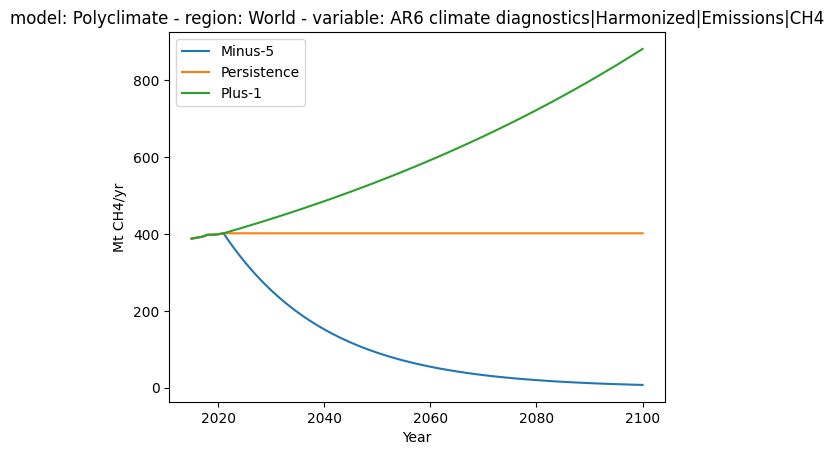

In [9]:
output.filter(variable="AR6 climate diagnostics|Harmonized|Emissions|CH4").plot()

<Axes: title={'center': 'model: Polyclimate - region: World - variable: AR6 climate diagnostics|Harmonized|Emissions|CO2|AFOLU'}, xlabel='Year', ylabel='Mt CO2/yr'>

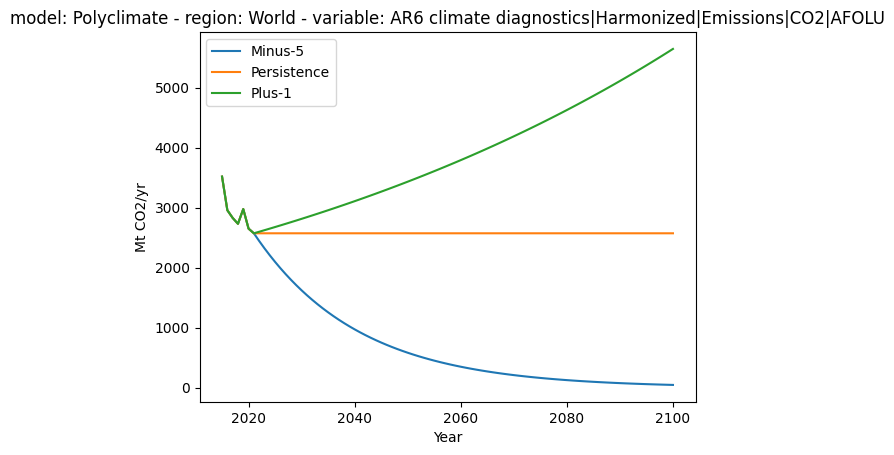

In [10]:
output.filter(variable="AR6 climate diagnostics|Harmonized|Emissions|CO2|AFOLU").plot()

<Axes: title={'center': 'model: Polyclimate - region: World - variable: AR6 climate diagnostics|Harmonized|Emissions|Kyoto Gases (AR6-GWP100)'}, xlabel='Year', ylabel='Mt CO2-equiv/yr'>

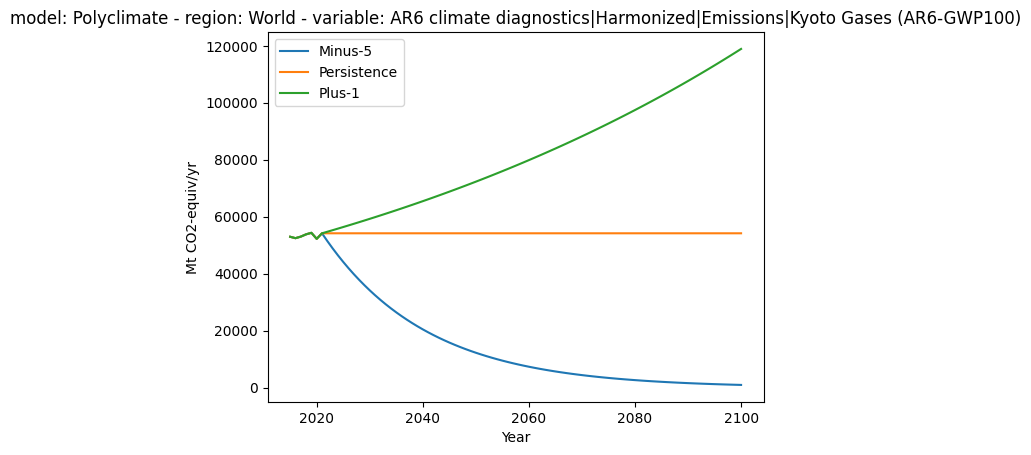

In [11]:
output.filter(
    variable="AR6 climate diagnostics|Harmonized|Emissions|Kyoto Gases (AR6-GWP100)"
).plot()

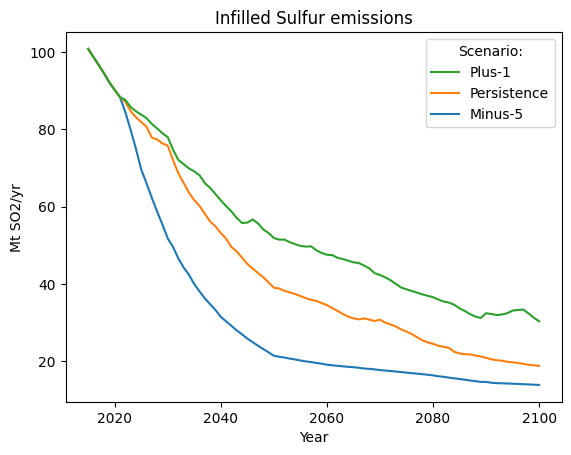

In [12]:
ax = output.filter(variable="AR6 climate diagnostics|Infilled|Emissions|Sulfur").plot()
ax.set_title("Infilled Sulfur emissions")
ax.legend(title="Scenario:", reverse=True)
plt.savefig("sulfur.png")

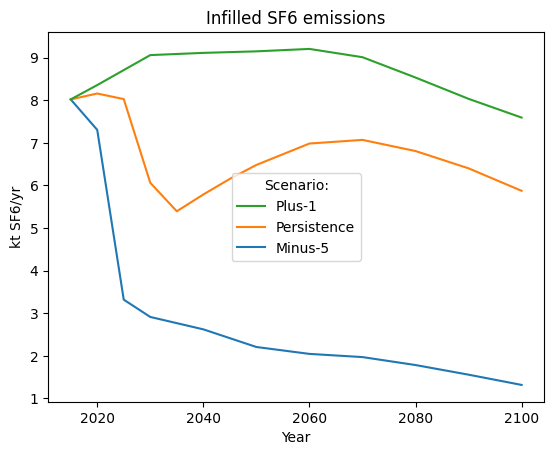

In [13]:
ax = output.filter(variable="AR6 climate diagnostics|Infilled|Emissions|SF6").plot()
ax.set_title("Infilled SF6 emissions")
ax.legend(title="Scenario:", reverse=True)
plt.savefig("sf6.png")

<Axes: title={'center': 'model: Polyclimate - region: World - variable: AR6 climate diagnostics|Infilled|Emissions|BC'}, xlabel='Year', ylabel='Mt BC/yr'>

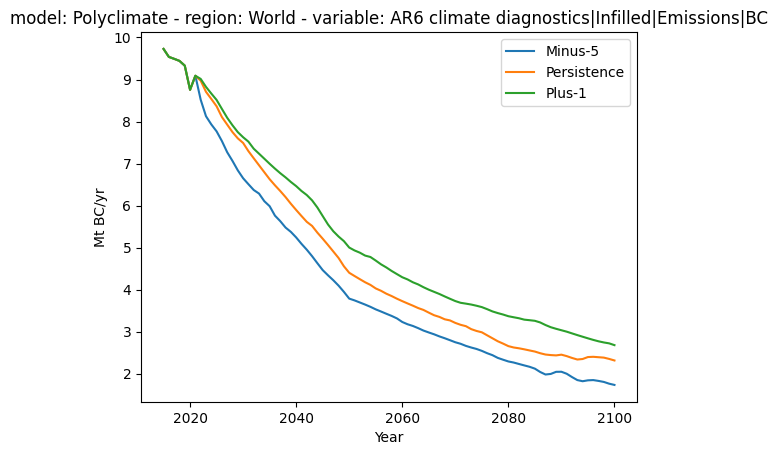

In [14]:
output.filter(variable="AR6 climate diagnostics|Infilled|Emissions|BC").plot()

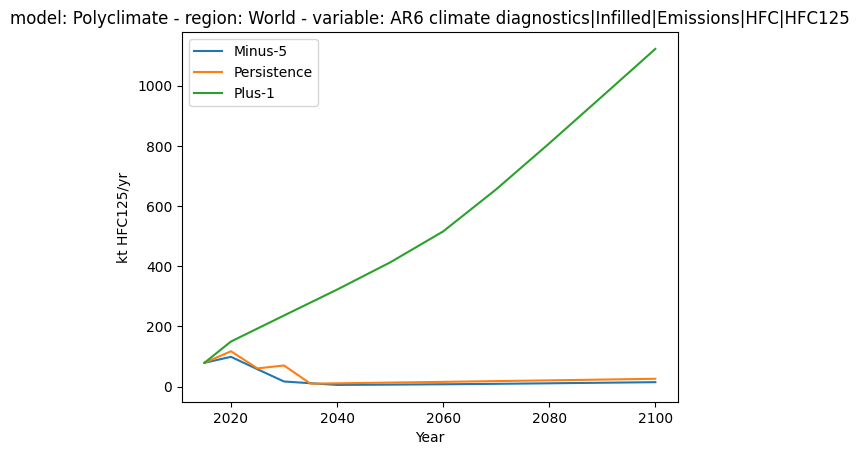

In [15]:
ax = output.filter(
    variable="AR6 climate diagnostics|Infilled|Emissions|HFC|HFC125"
).plot()